0
[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.
  2.  1.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  1.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  1.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  0.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  0.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.]
[[ 7.8         3.8       ]
 [ 5.18571429  3.95714286]
 [ 5.84822695  2.99858156]]
1
[ 1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  1.  1.  0.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.

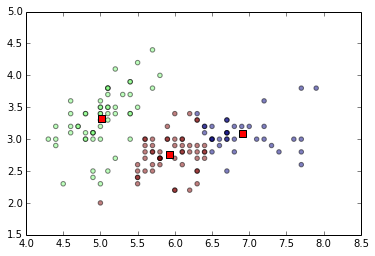

In [121]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


def shouldStop(oldCentroids, centroids, iterations):
    if iterations > 10: return True
    return (centroids==oldCentroids).all()

def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2))) 

# to assign labels to each datapoint based on centroids
def getLabels(dataSet, centroids):
    m = dataSet.shape[0];k = centroids.shape[0]
    clusterAssment=np.empty([m,2])
    for i in range(m):
        minDist = float('inf')
        minIndex = -1
        for j in range(k):
            distJI = distEclud(centroids[j,:],dataSet[i,:])
            if distJI < minDist:
                minDist = distJI; minIndex = j
        clusterAssment[i,:] = minIndex,minDist**2
    return clusterAssment

#to recalculate(Move) centroids    
def getCentroids(dataSet, labels, k):    
    for cent in range(k):
        ptsInClust = dataSet[np.nonzero(labels[:,0]==cent)[0]]#get all the point in this cluster
        centroids[cent,:] = np.mean(ptsInClust, axis=0) #move centroid to mean 
    return centroids
    
# To read input data  
dataFile=[]
with open("/resources/data2d.csv") as inputfile:
    for line in inputfile:
        words = line.strip().split(',')
        dataFile.append(words)
dataSet=np.asarray(dataFile, dtype = float)  


# Initialize centroids randomly
centroids = np.asarray([[8., 5.], [5., 5.], [6., 3.]])
    
# Initialize book keeping vars.
numFeatures = 2
k=3
iterations = 0
oldCentroids = np.empty([k,numFeatures])
    
# Run the main k-means algorithm
while not shouldStop(oldCentroids, centroids, iterations):
    print(iterations)
    oldCentroids = centroids.copy() # Save old centroids for convergence test.
    iterations += 1
    labels = getLabels(dataSet, centroids)
    print(labels[:,0])    
    centroids = getCentroids(dataSet, labels, k)
    print(centroids)
print(labels[:,0])
# To Visualize the results
fig = plt.figure(1)
plt.clf()
plt.scatter(dataSet[:, 0], dataSet[:, 1], c=labels[:,0],alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1],s=50, c=u'r', marker=u's')
plt.show()